In [ ]:
#Numbers to keep in mind
#The Ali results:  
#  \Delta^2 (k=0.2) = 400 mK^2 #2sigma
#  \Delta^2_sensitivity (k=0.2) = 300 mK^2 #2sigma

In [1]:
%matplotlib inline
import numpy as np
from pylab import *

In [46]:
class Sense(object):
    def __init__(self):
        self.Tsys = 0 #mK!
        #self.Omega_eff = 1.7 #Ali et al (taken from Zaki's evernote)
        self.Omega_eff = 3.5 #recalculation with capo/dcj/scripts/beam_integral.py
        self.t_int = 0
        self.Npols = 2
        self.X2Y = 518  #150MHz
        self.Ndays = 0
        self.Nlstbins = 0
        self.Nbls = 0
        self.P_N = None
        self.Nseps = 0
        return
    def calc(self):
        self.P_N = self.X2Y * self.Omega_eff * self.Tsys**2 
        self.P_N /=(self.t_int * self.Ndays * self.Nbls * self.Npols * np.sqrt(self.Nlstbins))
        self.P_N /= np.sqrt(2) #fold in k//
        self.P_N /= np.sqrt(self.Nseps)
    def Delta2_N(self,k):
        if self.P_N is None: print("noise undefined until first Sense.calc()"); return 0
        return self.P_N * k**3/(2*np.pi**2)

In [47]:
S = Sense()
S.Tsys = 551e3  #set to match 21cmsense exactly 
#S.Tsys = 486e3 #(200K + 180(150/180)^-2.55)
#S.Tsys = 505e3 #Ali et al, at 164MHz
S.t_int = 3414 # python ~/scripts/frf_diagnose.py -C psa6240_v003 --seps=0,1 -pxx; returns T_eff = 3414s (NEBW)
S.Ndays = 65
S.Nlstbins = 8.5
S.Nbls = 51
S.Nseps = 1
S.calc()
print "\Delta^2(k=0.2) = ",S.Delta2_N(0.2)

\Delta^2(k=0.2) =  2390.34034583


['name', 'uv_coverage_pess', 'uv_coverage', 'Trx', 'dish_size_in_lambda', 't_int', 'obs_duration']
1400.0


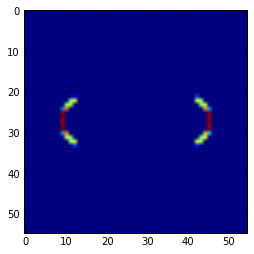

In [90]:
#take a look at the uv coverage in 21cmsense, verify that we're only simulating a single baseline
C = np.load('psa6240_v003.drift_blmin0_blmax23_arrayfile.npz')
print C.files
imshow(C['uv_coverage'])
print C['uv_coverage'].max()

In [92]:
#load the 21cmsense calculation whichshould nominally match
# /Users/djacobs/Work/radio_astronomy/Papers/psa64_multiz/data/21cmSense
# ./mk_array_file.py -C psa6240_v003 --bl_max=45
# ./calc_sense.py  --nchan=21 --bwidth=0.010 --n_per_day=8.5 --ndays=65  -f 0.150 --no_ns psa6240_v003drift_blmin0_blmax23_arrayfile.npz -m pess
#     'dish_size_in_lambda' : 0.82, #in units of wavelengths, effective dish size calculated with capo/dcj/scripts/beam_integral.py
#     'Trx' : 200e3, #receiver temp in mK
F = np.load('psa6240_v003drift_pess_0.150.npz')
print "k=",F['ks'][3]
print "\Delta^2(k=0.2) = ",F['T_errs'][3]

k= 0.202313817753
\Delta^2(k=0.2) =  4485.99520739


In [45]:
#load a power spectrum of a noise realization
# this realization assumes a Tsky+Trcvr model for noise, 
# takes into account the known lstbinning counts of the psa64 run
# it is filtered with frscale of 1.2, frwidth of 1.3 and maxfr=0.0013 (basically optimal but slightly tweaked)
# here I am using the 95% limit of the injected signal 
P = np.load('pspec_limits_k3pk_pI_95.npz')
print "k = ",P['k'][4]
print "\Delta^2(k=0.2) = ",P['k3err'][4]

k =  0.197972071238
\Delta^2(k=0.2) =  4684.94751642
